# Neural Network

In [3]:
#Importing Tensorflow
import tensorflow as tf
import numpy as np

In [4]:
#Defining the network
n_features = 10
n_dense_neurons = 3

In [5]:
#Creating the first placeholder for the network
x = tf.placeholder(tf.float32, (None, n_features))

In [6]:
#Creating the layer
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#Baises for the layer
b = tf.ones([n_dense_neurons])

In [8]:
#Getting a the output for that layer
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [9]:
#Setting Activation Function
a = tf.sigmoid(z)

In [10]:
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    

In [12]:
print(layer_out)

[[0.8905781 0.9392253 0.8117622]]


# Simple Regression Problem

In [51]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [52]:
x_data

array([-1.33978874,  1.82822198,  2.52270604,  4.49024482,  3.79171832,
        5.41783235,  5.18305093,  7.53751119,  8.95091994, 10.13670433])

In [53]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [54]:
y_data

array([-1.12374112e+00,  5.71734359e-03,  2.73519838e+00,  4.30872297e+00,
        4.87860262e+00,  5.32802844e+00,  7.19765304e+00,  7.62435377e+00,
        8.82893966e+00,  9.76661541e+00])

In [55]:
import matplotlib.pyplot as plt

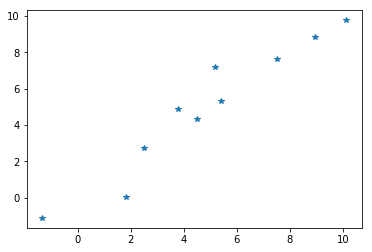

In [56]:
plt.plot(x_data, y_data, '*')

y = mx + b

In [57]:
rand = np.random.rand(2)
rand

array([0.46032953, 0.84047832])

In [58]:
# Setting M a=and b to random values
M = tf.Variable(rand[0])
b = tf.Variable(rand[1])

In [59]:
#Calculating Error
error = 0

for x,y in zip(x_data, y_data):
    
    y_hat = M*x + b
    error = (y-y_hat)**2

In [60]:
#Setting up the Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [61]:
# Always Initialize globale variable
init = tf.global_variables_initializer()

In [62]:
#Run the the Session and train it by how many train_step
with tf.Session() as sess:
    sess.run(init)
    
    train_step = 100
    
    for _ in range(train_step):
        sess.run(train)
    
    m_final, b_final = sess.run([M, b])

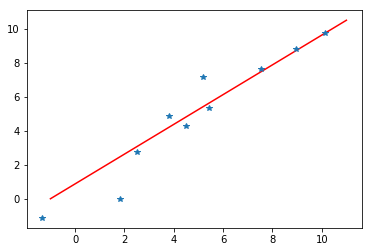

In [66]:
#Graphing the results
x = np.linspace(-1,11,10)
y = m_final * x + b_final
plt.plot(x,y,'r')
plt.plot(x_data,y_data,'*')